# Prediction Models Part 1: kNN

Regarding the possible linear dependence of the features and to avoid overfitting, we apply:

1. ElasticNet regression

2. kNN

3. Neural Network models. 

In order to decide on model parameters and compare different models' accuracies, we use cross validation techniques like k-fold cross validation, LOOCV, and stratification considering the small number of observations.

In [1]:
#Importing necessary packages

import os
import numpy as np
import sklearn
import pandas as pd
import random

#For plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE

from sklearn.linear_model import ElasticNet,ElasticNetCV 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns

from scipy import interpolate
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

path = '/Users/nesli/Desktop/SPRING2022/DSCC465/Project/'
os.chdir(path)

random.seed(265) #seed

## Read the data

In [2]:
X=pd.read_csv('X_same_with_pcs.csv')

In [3]:
y=pd.read_csv('y.csv')

In [4]:
X.drop(columns=X.columns[0], axis=1, inplace=True)

In [5]:
X

,percent_fair_or_poor_health,average_number_of_mentally_unhealthy_days,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_excessive_drinking,num_driving_deaths,num_uninsured,num_primary_care_physicians,num_dentists,...,percentile_rank_social_vulnerability,pca_pc1,pca_pc2,pca_pc3,spec_pc1,spec_pc2,spec_pc3,tsne_pc1,tsne_pc2,tsne_pc3
0,0.388267,0.561029,0.342101,0.461369,0.720000,0.346707,0.015506,0.004474,0.003380,0.002061,...,0.377300,-0.612896,0.063201,-0.313888,0.000252,-0.001221,0.000717,-5.478652,-3.007624,11.151594
1,0.285624,0.468466,0.325449,0.410596,0.800000,0.487587,0.043699,0.021010,0.020954,0.012368,...,0.275700,0.993903,-0.082875,-0.187324,-0.000580,-0.000771,-0.001262,2.447136,-7.664367,-0.042642
2,0.653214,0.701619,0.452223,0.646799,0.560000,0.241874,0.008176,0.002321,0.001082,0.001031,...,0.984700,-2.264915,0.629004,0.769147,0.001032,-0.000120,0.001038,-5.176828,8.238961,4.895467
3,0.344359,0.533963,0.371122,0.556291,0.780000,0.372844,0.007894,0.001871,0.001487,0.000573,...,0.573700,-3.950356,0.145724,0.101242,0.001571,0.001361,-0.000986,-5.714986,16.582363,0.309691
4,0.414500,0.623824,0.373777,0.472406,0.840000,0.308491,0.020017,0.006939,0.001757,0.001260,...,0.498600,-3.358407,-0.504476,-0.055199,0.001457,0.001013,-0.000416,-2.518751,17.053493,4.764736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,0.225641,0.300716,0.317682,0.516556,0.740000,0.543080,0.005357,0.002620,0.001217,0.002061,...,0.535200,1.737956,0.342858,-0.128236,-0.000870,-0.000163,-0.001173,0.091839,-1.043154,-7.836049
3140,0.238373,0.304077,0.307754,0.362031,0.830000,0.418641,0.001128,0.001128,0.000541,0.000687,...,0.592800,1.940699,-0.005748,0.257216,-0.000957,0.000061,-0.001021,5.933311,-3.059773,-6.624521
3141,0.176860,0.298239,0.303081,0.461369,0.790000,0.474434,0.002537,0.000752,0.000406,0.000573,...,0.271600,3.049711,-0.033842,0.486872,-0.001253,0.001024,0.000417,4.736609,-10.780089,-13.694742
3142,0.251945,0.439812,0.359885,0.445514,0.738523,0.626147,0.184663,0.115827,0.109639,0.099175,...,0.392899,0.729907,0.352062,-0.707103,-0.000480,-0.000900,-0.001095,-2.299268,-8.020679,0.646890


In [6]:
y

,Unnamed: 0,life_expectancy
0,0,76.879477
1,1,78.450258
2,2,75.341935
3,3,73.571820
4,4,74.145826
...,...,...
3139,3139,79.245997
3140,3140,79.451504
3141,3141,80.549081
3142,3142,78.173254


In [7]:
y.drop(columns=y.columns[0], axis=1, inplace=True)

In [8]:
y

,life_expectancy
0,76.879477
1,78.450258
2,75.341935
3,73.571820
4,74.145826
...,...
3139,79.245997
3140,79.451504
3141,80.549081
3142,78.173254


Here, our data is not given with training and test sets. So we will be building models by dividing the data to test and train sets using different methods.

## Train-test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=465)

This is the same test and train data sets as used for ElasticNet. So we can compare their results.

## kNN Regressor Model

We follow from [1]. We first try with predicting a value by checking the 3 nearest neighbors. This is a parameter that we can tune later.

In [10]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [11]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [12]:
# Predict for the training set
y_train_pred = knn_model.predict(X_train)

In [13]:
mse = mean_squared_error(y_train, y_train_pred)
mse

0.03717603698521567

In [14]:
# RMSE
np.sqrt(mse)

0.1928108839905457

In [15]:
# Now, for the test set
y_pred = knn_model.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
mse

0.045627351028480694

In [17]:
# RMSE
np.sqrt(mse)

0.21360559690345357

In [18]:
X_test

,percent_fair_or_poor_health,average_number_of_mentally_unhealthy_days,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_excessive_drinking,num_driving_deaths,num_uninsured,num_primary_care_physicians,num_dentists,...,percentile_rank_social_vulnerability,pca_pc1,pca_pc2,pca_pc3,spec_pc1,spec_pc2,spec_pc3,tsne_pc1,tsne_pc2,tsne_pc3
1480,0.520039,0.600219,0.404362,0.589404,0.61,0.211106,0.004511,0.002582,0.000946,0.000458,...,0.9452,-3.226239,0.369251,0.428374,0.001433,0.000942,-0.000304,-6.366419,13.166718,2.745336
2451,0.387876,0.484332,0.404462,0.501104,0.80,0.250911,0.009867,0.003793,0.001893,0.001260,...,0.3145,0.490650,-0.371785,0.220870,-0.000314,-0.001096,-0.000760,6.817798,-4.942546,3.006440
892,0.282916,0.325315,0.321318,0.589404,0.75,0.426184,0.005075,0.002949,0.001893,0.001489,...,0.5081,0.848509,0.000745,-0.135135,-0.000516,-0.000862,-0.001169,0.947314,-7.120271,0.555805
324,0.288579,0.528951,0.307951,0.379691,0.71,0.526955,0.116154,0.064097,0.058267,0.039968,...,0.4266,0.283397,-0.133097,-0.088011,-0.000232,-0.001178,-0.000582,3.906079,-2.870054,4.334301
1105,0.459793,0.625742,0.463869,0.419426,0.71,0.382054,0.003947,0.000958,0.000406,0.000687,...,0.6141,-3.679211,0.005538,0.100413,0.001543,0.001274,-0.000838,-5.508257,16.487885,1.006190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.403162,0.407723,0.369793,0.534216,0.57,0.250101,0.038906,0.019425,0.027173,0.010536,...,0.9172,-3.185791,0.911231,-0.430720,0.001376,0.000786,-0.000099,-5.399396,10.450007,-0.720050
1027,0.390428,0.634066,0.455557,0.476821,0.76,0.417920,0.001692,0.001015,0.000946,0.000458,...,0.7892,-3.416656,-0.326038,0.001825,0.001482,0.001089,-0.000534,-1.944048,16.353867,4.335393
480,0.394314,0.454407,0.373613,0.258278,0.66,0.282193,0.010431,0.002871,0.001487,0.000916,...,0.9484,-3.365815,0.582099,0.044814,0.001467,0.001045,-0.000470,-6.335015,12.087398,1.057747
538,0.367536,0.387463,0.314736,0.295806,0.71,0.261494,0.001410,0.000327,0.006321,0.000000,...,0.7663,0.908355,-0.038305,0.691316,-0.000528,-0.000817,-0.001121,4.931877,0.120997,-3.754286


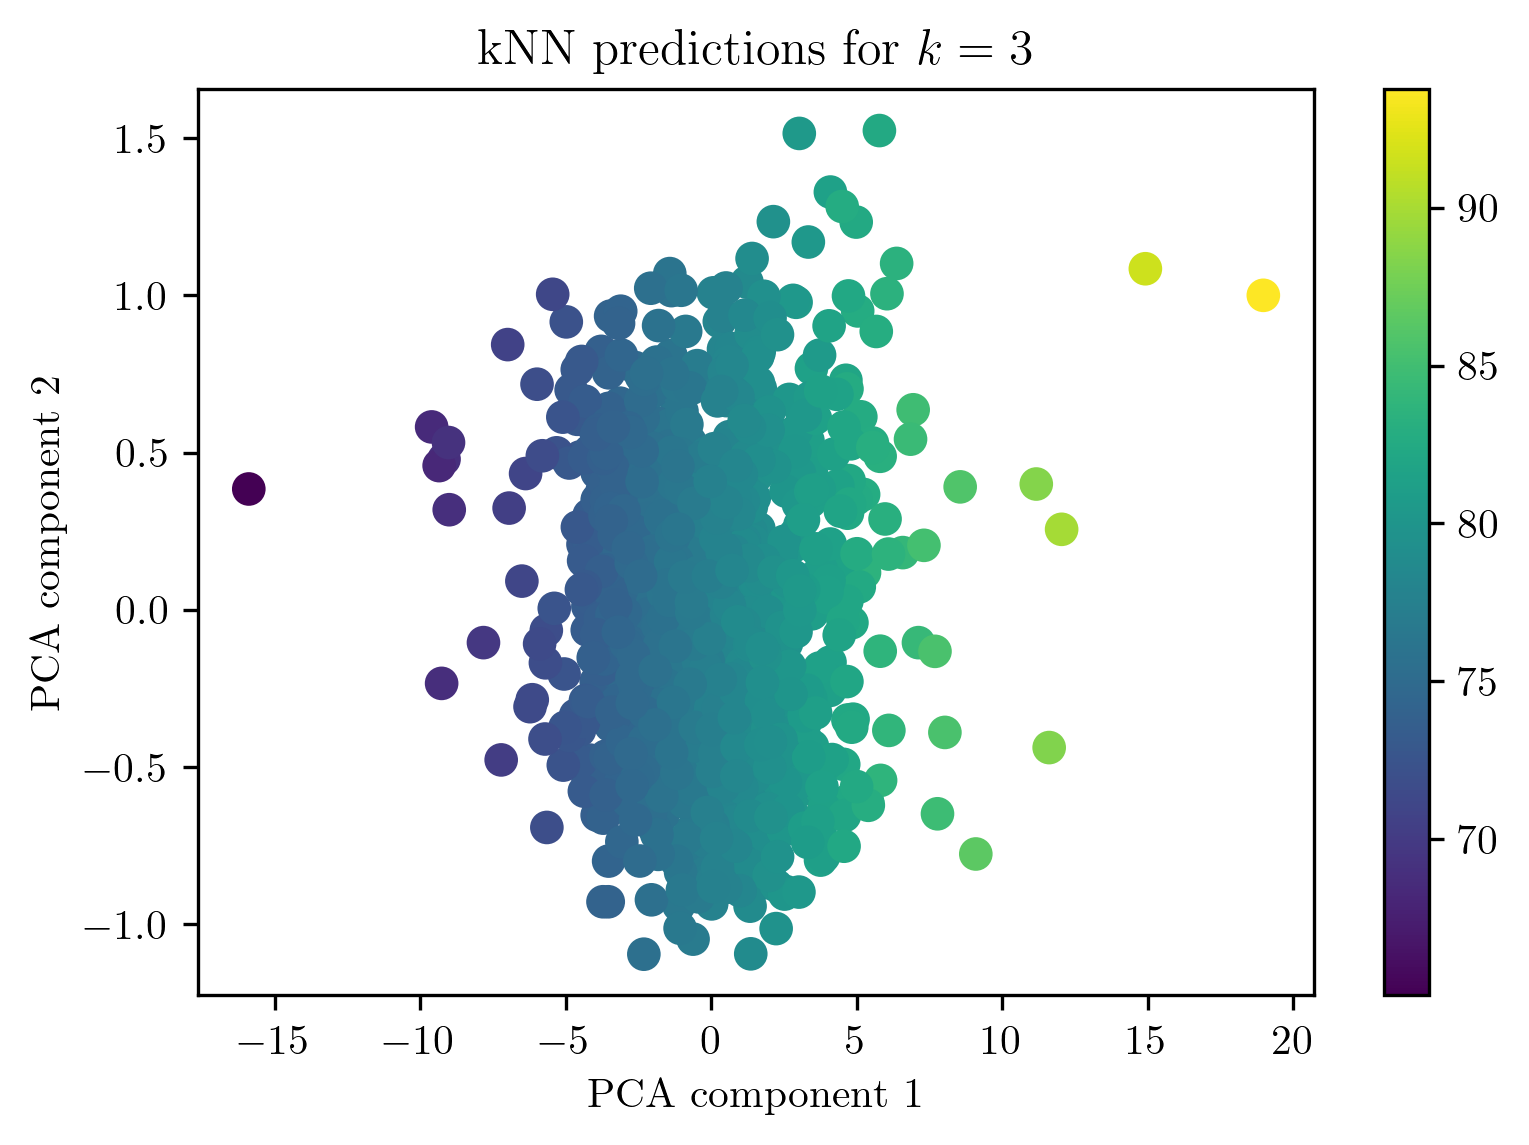

In [19]:
# Plot the fit
plt.figure()
%matplotlib inline
import matplotlib.pyplot as plt
dpi=300   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

cmap=sns.color_palette("viridis", as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test['pca_pc1'], X_test['pca_pc2'], c=y_pred, s=50, cmap=cmap)
f.colorbar(points)
plt.title(r'kNN predictions for $k=3$',fontsize=12)
plt.ylabel(r'PCA component 2',fontsize=10)
plt.xlabel(r'PCA component 1',fontsize=10)
plt.show()

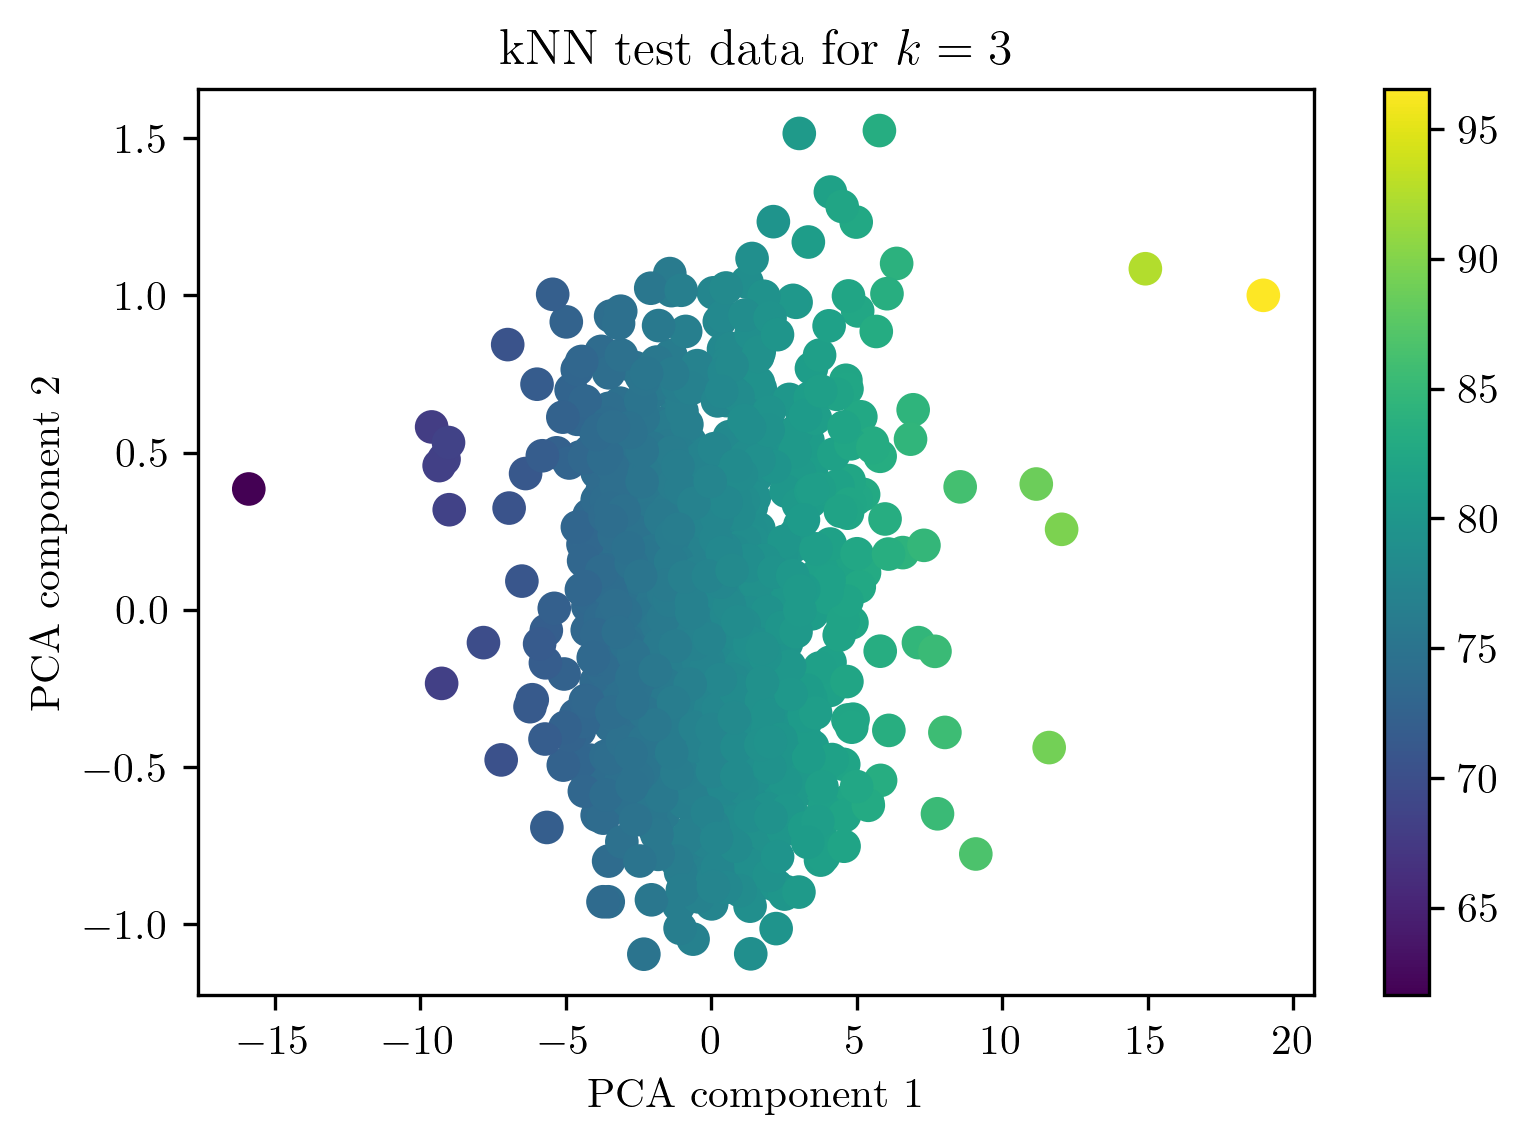

In [20]:
# Plot the actual data
plt.figure()
%matplotlib inline
import matplotlib.pyplot as plt
dpi=300   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

cmap=sns.color_palette("viridis", as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test['pca_pc1'], X_test['pca_pc2'], c=y_test['life_expectancy'], s=50, cmap=cmap)
f.colorbar(points)
plt.title(r'kNN test data for $k=3$',fontsize=12)
plt.ylabel(r'PCA component 2',fontsize=10)
plt.xlabel(r'PCA component 1',fontsize=10)
plt.show()

## Now, tune the parameter k

In [21]:
k_values=[1, 10, 100, 1000]

In [22]:
for k in k_values:
    print(r'For k='+str(k))
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_train_pred = knn_model.predict(X_train)
    mse = mean_squared_error(y_train, y_train_pred)
    rmse=np.sqrt(mse)
    print(r'For training set, RMSE='+str(rmse)+", and MSE="+str(mse))
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    print(r'For test set, RMSE='+str(rmse)+", and MSE="+str(mse))

For k=1
For training set, RMSE=0.0, and MSE=0.0
For test set, RMSE=0.1814637376249069, and MSE=0.032929088072801045
For k=10
For training set, RMSE=0.3511373932057475, and MSE=0.12329746890732772
For test set, RMSE=0.2987745212667908, and MSE=0.08926621455820005
For k=100
For training set, RMSE=0.7241291120167525, and MSE=0.5243629708701705
For test set, RMSE=0.7224446264482385, and MSE=0.5219262382839348
For k=1000
For training set, RMSE=1.6655946577039604, and MSE=2.7742055637719734
For test set, RMSE=1.6569450311567144, and MSE=2.7454668362749257


In [23]:
k_values=np.arange(10)+1

In [24]:
k_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [25]:
for k in k_values:
    print(r'For k='+str(k))
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_train_pred = knn_model.predict(X_train)
    mse = mean_squared_error(y_train, y_train_pred)
    rmse=np.sqrt(mse)
    print(r'For training set, RMSE='+str(rmse)+", and MSE="+str(mse))
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    print(r'For test set, RMSE='+str(rmse)+", and MSE="+str(mse))

For k=1
For training set, RMSE=0.0, and MSE=0.0
For test set, RMSE=0.1814637376249069, and MSE=0.032929088072801045
For k=2
For training set, RMSE=0.1317242481187159, and MSE=0.017351277542441028
For test set, RMSE=0.1877742738033902, and MSE=0.035259177902390554
For k=3
For training set, RMSE=0.1928108839905457, and MSE=0.03717603698521567
For test set, RMSE=0.21360559690345357, and MSE=0.045627351028480694
For k=4
For training set, RMSE=0.2314022461070689, and MSE=0.05354699950339648
For test set, RMSE=0.23918190041313622, and MSE=0.05720798148523941
For k=5
For training set, RMSE=0.26132084664035476, and MSE=0.06828858488883183
For test set, RMSE=0.2589695668849577, and MSE=0.06706523657258258
For k=6
For training set, RMSE=0.2733407504607957, and MSE=0.07471516586247098
For test set, RMSE=0.2721947594794781, and MSE=0.07408998708809092
For k=7
For training set, RMSE=0.29541515755388403, and MSE=0.08727011531258613
For test set, RMSE=0.249174790394354, and MSE=0.06208807616807025
Fo

Here, as k increases RMSE for training set increases, however, RMSE for the test set decreases for once at $k=7$. Here, we are using test set to validate the value for k. So we should instead have $k=7$.

In [26]:
k=7

In [27]:
print(r'For k='+str(k))
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse=np.sqrt(mse)
print(r'For training set, RMSE='+str(rmse)+", and MSE="+str(mse))
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(r'For test set, RMSE='+str(rmse)+", and MSE="+str(mse))

For k=7
For training set, RMSE=0.29541515755388403, and MSE=0.08727011531258613
For test set, RMSE=0.249174790394354, and MSE=0.06208807616807025


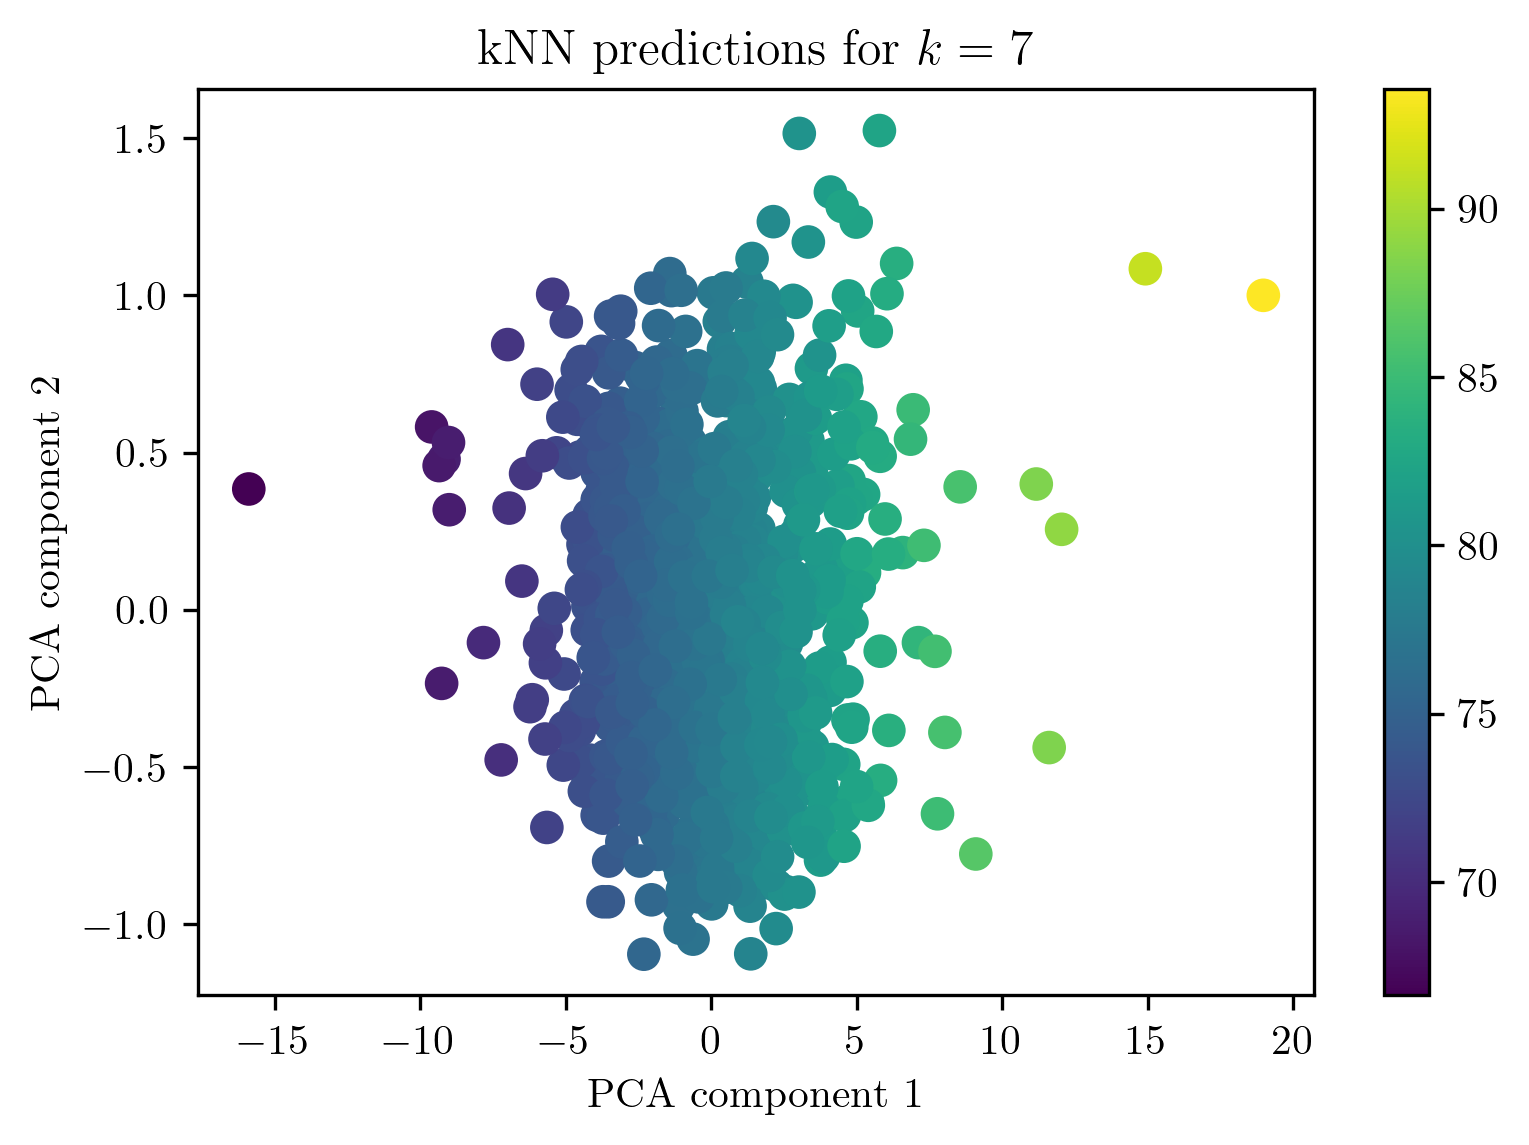

In [28]:
# Plot the fit
plt.figure()
%matplotlib inline
import matplotlib.pyplot as plt
dpi=300   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

cmap=sns.color_palette("viridis", as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test['pca_pc1'], X_test['pca_pc2'], c=y_pred, s=50, cmap=cmap)
f.colorbar(points)
plt.title(r'kNN predictions for $k=7$',fontsize=12)
plt.ylabel(r'PCA component 2',fontsize=10)
plt.xlabel(r'PCA component 1',fontsize=10)
plt.show()

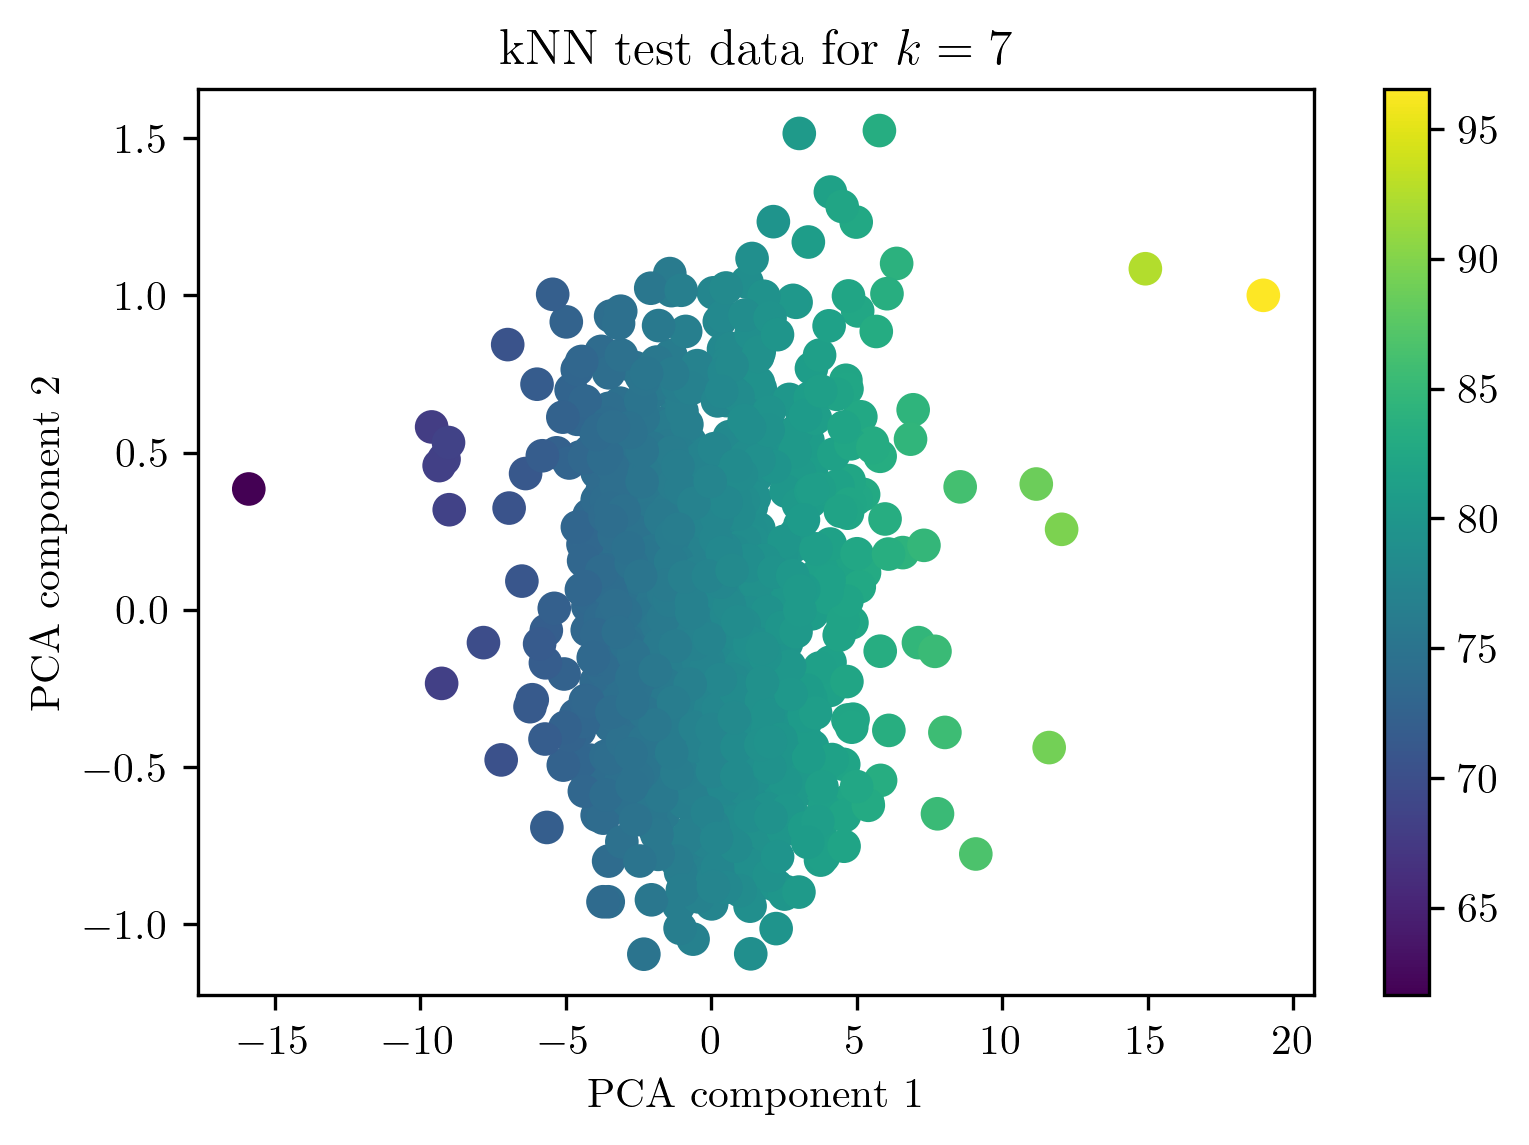

In [29]:
# Plot the actual data
plt.figure()
%matplotlib inline
import matplotlib.pyplot as plt
dpi=300   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

cmap=sns.color_palette("viridis", as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test['pca_pc1'], X_test['pca_pc2'], c=y_test['life_expectancy'], s=50, cmap=cmap)
f.colorbar(points)
plt.title(r'kNN test data for $k=7$',fontsize=12)
plt.ylabel(r'PCA component 2',fontsize=10)
plt.xlabel(r'PCA component 1',fontsize=10)
plt.show()

## Save the best predictions

In [30]:
y_pred=pd.DataFrame(y_pred, columns=['life_expectancy'])

In [31]:
y_pred.to_csv('y_pred_same_withpcs_kNN.csv')

## Remove PCA, spectral embedding, and t-SNE columns

In [32]:
X

,percent_fair_or_poor_health,average_number_of_mentally_unhealthy_days,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_excessive_drinking,num_driving_deaths,num_uninsured,num_primary_care_physicians,num_dentists,...,percentile_rank_social_vulnerability,pca_pc1,pca_pc2,pca_pc3,spec_pc1,spec_pc2,spec_pc3,tsne_pc1,tsne_pc2,tsne_pc3
0,0.388267,0.561029,0.342101,0.461369,0.720000,0.346707,0.015506,0.004474,0.003380,0.002061,...,0.377300,-0.612896,0.063201,-0.313888,0.000252,-0.001221,0.000717,-5.478652,-3.007624,11.151594
1,0.285624,0.468466,0.325449,0.410596,0.800000,0.487587,0.043699,0.021010,0.020954,0.012368,...,0.275700,0.993903,-0.082875,-0.187324,-0.000580,-0.000771,-0.001262,2.447136,-7.664367,-0.042642
2,0.653214,0.701619,0.452223,0.646799,0.560000,0.241874,0.008176,0.002321,0.001082,0.001031,...,0.984700,-2.264915,0.629004,0.769147,0.001032,-0.000120,0.001038,-5.176828,8.238961,4.895467
3,0.344359,0.533963,0.371122,0.556291,0.780000,0.372844,0.007894,0.001871,0.001487,0.000573,...,0.573700,-3.950356,0.145724,0.101242,0.001571,0.001361,-0.000986,-5.714986,16.582363,0.309691
4,0.414500,0.623824,0.373777,0.472406,0.840000,0.308491,0.020017,0.006939,0.001757,0.001260,...,0.498600,-3.358407,-0.504476,-0.055199,0.001457,0.001013,-0.000416,-2.518751,17.053493,4.764736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,0.225641,0.300716,0.317682,0.516556,0.740000,0.543080,0.005357,0.002620,0.001217,0.002061,...,0.535200,1.737956,0.342858,-0.128236,-0.000870,-0.000163,-0.001173,0.091839,-1.043154,-7.836049
3140,0.238373,0.304077,0.307754,0.362031,0.830000,0.418641,0.001128,0.001128,0.000541,0.000687,...,0.592800,1.940699,-0.005748,0.257216,-0.000957,0.000061,-0.001021,5.933311,-3.059773,-6.624521
3141,0.176860,0.298239,0.303081,0.461369,0.790000,0.474434,0.002537,0.000752,0.000406,0.000573,...,0.271600,3.049711,-0.033842,0.486872,-0.001253,0.001024,0.000417,4.736609,-10.780089,-13.694742
3142,0.251945,0.439812,0.359885,0.445514,0.738523,0.626147,0.184663,0.115827,0.109639,0.099175,...,0.392899,0.729907,0.352062,-0.707103,-0.000480,-0.000900,-0.001095,-2.299268,-8.020679,0.646890


In [33]:
# Select the last 9 columns [2]
pcs = X.T.tail(9).T

In [34]:
pcs

,pca_pc1,pca_pc2,pca_pc3,spec_pc1,spec_pc2,spec_pc3,tsne_pc1,tsne_pc2,tsne_pc3
0,-0.612896,0.063201,-0.313888,0.000252,-0.001221,0.000717,-5.478652,-3.007624,11.151594
1,0.993903,-0.082875,-0.187324,-0.000580,-0.000771,-0.001262,2.447136,-7.664367,-0.042642
2,-2.264915,0.629004,0.769147,0.001032,-0.000120,0.001038,-5.176828,8.238961,4.895467
3,-3.950356,0.145724,0.101242,0.001571,0.001361,-0.000986,-5.714986,16.582363,0.309691
4,-3.358407,-0.504476,-0.055199,0.001457,0.001013,-0.000416,-2.518751,17.053493,4.764736
...,...,...,...,...,...,...,...,...,...
3139,1.737956,0.342858,-0.128236,-0.000870,-0.000163,-0.001173,0.091839,-1.043154,-7.836049
3140,1.940699,-0.005748,0.257216,-0.000957,0.000061,-0.001021,5.933311,-3.059773,-6.624521
3141,3.049711,-0.033842,0.486872,-0.001253,0.001024,0.000417,4.736609,-10.780089,-13.694742
3142,0.729907,0.352062,-0.707103,-0.000480,-0.000900,-0.001095,-2.299268,-8.020679,0.646890


In [35]:
X_removed = X.iloc[: , :-9]

In [36]:
X_removed

,percent_fair_or_poor_health,average_number_of_mentally_unhealthy_days,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_excessive_drinking,num_driving_deaths,num_uninsured,num_primary_care_physicians,num_dentists,...,num_minorities,num_institutionalized_in_group_quarters,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_minorities,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
0,0.388267,0.561029,0.342101,0.461369,0.720000,0.346707,0.015506,0.004474,0.003380,0.002061,...,0.001816,0.002771,0.196400,0.831300,0.633900,0.679100,0.726800,0.125100,0.288100,0.377300
1,0.285624,0.468466,0.325449,0.410596,0.800000,0.487587,0.043699,0.021010,0.020954,0.012368,...,0.004554,0.016464,0.643700,0.447600,0.525300,0.973300,0.538700,0.343800,0.332400,0.275700
2,0.653214,0.701619,0.452223,0.646799,0.560000,0.241874,0.008176,0.002321,0.001082,0.001031,...,0.001954,0.016583,0.417400,0.361700,0.904200,0.281400,0.937000,0.942700,0.931200,0.984700
3,0.344359,0.533963,0.371122,0.556291,0.780000,0.372844,0.007894,0.001871,0.001487,0.000573,...,0.000773,0.011317,0.258500,0.308800,0.645000,0.407200,0.924900,0.915600,0.666300,0.573700
4,0.414500,0.623824,0.373777,0.472406,0.840000,0.308491,0.020017,0.006939,0.001757,0.001260,...,0.000966,0.003122,0.490900,0.646600,0.423800,0.134400,0.846500,0.151500,0.182700,0.498600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,0.225641,0.300716,0.317682,0.516556,0.740000,0.543080,0.005357,0.002620,0.001217,0.002061,...,0.000348,0.001380,0.044600,0.966900,0.421200,0.770500,0.875800,0.215900,0.656200,0.535200
3140,0.238373,0.304077,0.307754,0.362031,0.830000,0.418641,0.001128,0.001128,0.000541,0.000687,...,0.000199,0.000995,0.730000,0.800700,0.536100,0.346400,0.511600,0.537400,0.514200,0.592800
3141,0.176860,0.298239,0.303081,0.461369,0.790000,0.474434,0.002537,0.000752,0.000406,0.000573,...,0.000076,0.002013,0.615100,0.307500,0.288800,0.552100,0.861800,0.807700,0.633900,0.271600
3142,0.251945,0.439812,0.359885,0.445514,0.738523,0.626147,0.184663,0.115827,0.109639,0.099175,...,0.043998,0.091127,0.166922,0.744178,0.675575,0.879288,0.055045,0.329812,0.384675,0.392899


## Now, repeat without the principal components 

## Train-test split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_removed, y, test_size=0.3, random_state=465)

## kNN Regressor Model

We follow from [1]. We first try with predicting a value by checking the 3 nearest neighbors. This is a parameter that we can tune later.

In [38]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [39]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [40]:
# Predict for the training set
y_train_pred = knn_model.predict(X_train)

In [41]:
mse = mean_squared_error(y_train, y_train_pred)
mse

1.629969307751983

In [42]:
# RMSE
np.sqrt(mse)

1.2767025134117904

In [43]:
# Now, for the test set
y_pred = knn_model.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
mse

3.8377625769800554

In [45]:
# RMSE
np.sqrt(mse)

1.959020820966448

In [46]:
X_test

,percent_fair_or_poor_health,average_number_of_mentally_unhealthy_days,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_excessive_drinking,num_driving_deaths,num_uninsured,num_primary_care_physicians,num_dentists,...,num_minorities,num_institutionalized_in_group_quarters,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_minorities,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
1480,0.520039,0.600219,0.404362,0.589404,0.61,0.211106,0.004511,0.002582,0.000946,0.000458,...,0.001243,0.002715,0.5435,0.6692,0.8816,0.0971,0.7466,0.6154,0.8430,0.9452
2451,0.387876,0.484332,0.404462,0.501104,0.80,0.250911,0.009867,0.003793,0.001893,0.001260,...,0.001691,0.002771,0.6332,0.2869,0.7198,0.1999,0.5775,0.2537,0.1299,0.3145
892,0.282916,0.325315,0.321318,0.589404,0.75,0.426184,0.005075,0.002949,0.001893,0.001489,...,0.000654,0.002947,0.5237,0.7580,0.5380,0.5626,0.3295,0.4912,0.3419,0.5081
324,0.288579,0.528951,0.307951,0.379691,0.71,0.526955,0.116154,0.064097,0.058267,0.039968,...,0.018413,0.035553,0.8723,0.1089,0.6329,0.9220,0.3566,0.2006,0.3649,0.4266
1105,0.459793,0.625742,0.463869,0.419426,0.71,0.382054,0.003947,0.000958,0.000406,0.000687,...,0.000355,0.009100,0.2639,0.2120,0.5326,0.1662,0.6180,0.9392,0.6288,0.6141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.403162,0.407723,0.369793,0.534216,0.57,0.250101,0.038906,0.019425,0.027173,0.010536,...,0.012584,0.036175,0.1885,0.8284,0.9347,0.8905,0.1130,0.7689,0.8733,0.9172
1027,0.390428,0.634066,0.455557,0.476821,0.76,0.417920,0.001692,0.001015,0.000946,0.000458,...,0.000075,0.000181,0.3894,0.7791,0.0745,0.1098,0.9370,0.0229,0.5667,0.7892
480,0.394314,0.454407,0.373613,0.258278,0.66,0.282193,0.010431,0.002871,0.001487,0.000916,...,0.001331,0.001855,0.3464,0.8669,0.8586,0.6062,0.8434,0.3649,0.9166,0.9484
538,0.367536,0.387463,0.314736,0.295806,0.71,0.261494,0.001410,0.000327,0.006321,0.000000,...,0.000184,0.000028,0.5237,0.6663,0.8860,0.0000,0.9962,0.0210,0.2792,0.7663


In [47]:
X_test["percent_fair_or_poor_health"]

1480    0.520039
2451    0.387876
892     0.282916
324     0.288579
1105    0.459793
          ...   
397     0.403162
1027    0.390428
480     0.394314
538     0.367536
734     0.358789
Name: percent_fair_or_poor_health, Length: 944, dtype: float64

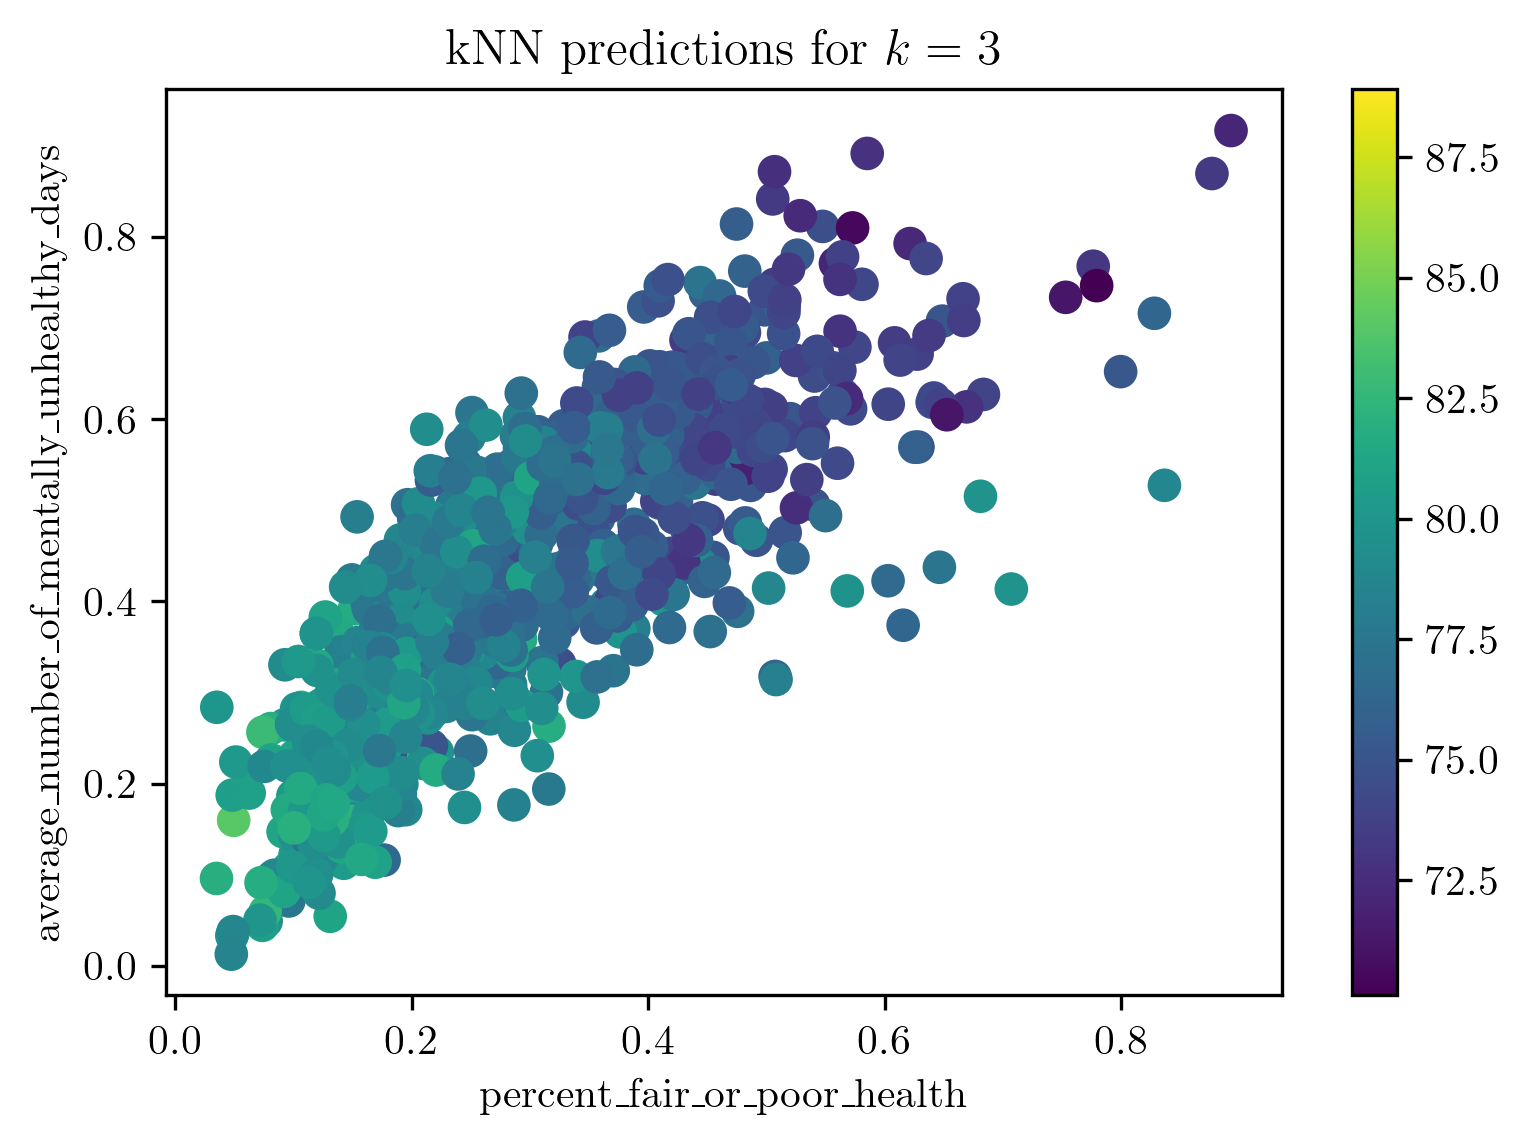

In [48]:
# Plot the fit
plt.figure()
%matplotlib inline
import matplotlib.pyplot as plt
dpi=300   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

cmap=sns.color_palette("viridis", as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test["percent_fair_or_poor_health"], X_test["average_number_of_mentally_unhealthy_days"], c=y_pred, s=50, cmap=cmap)
f.colorbar(points)
plt.title(r'kNN predictions for $k=3$',fontsize=12)
plt.ylabel(r'average_number_of_mentally_unhealthy_days',fontsize=10)
plt.xlabel(r'percent_fair_or_poor_health',fontsize=10)
plt.show()

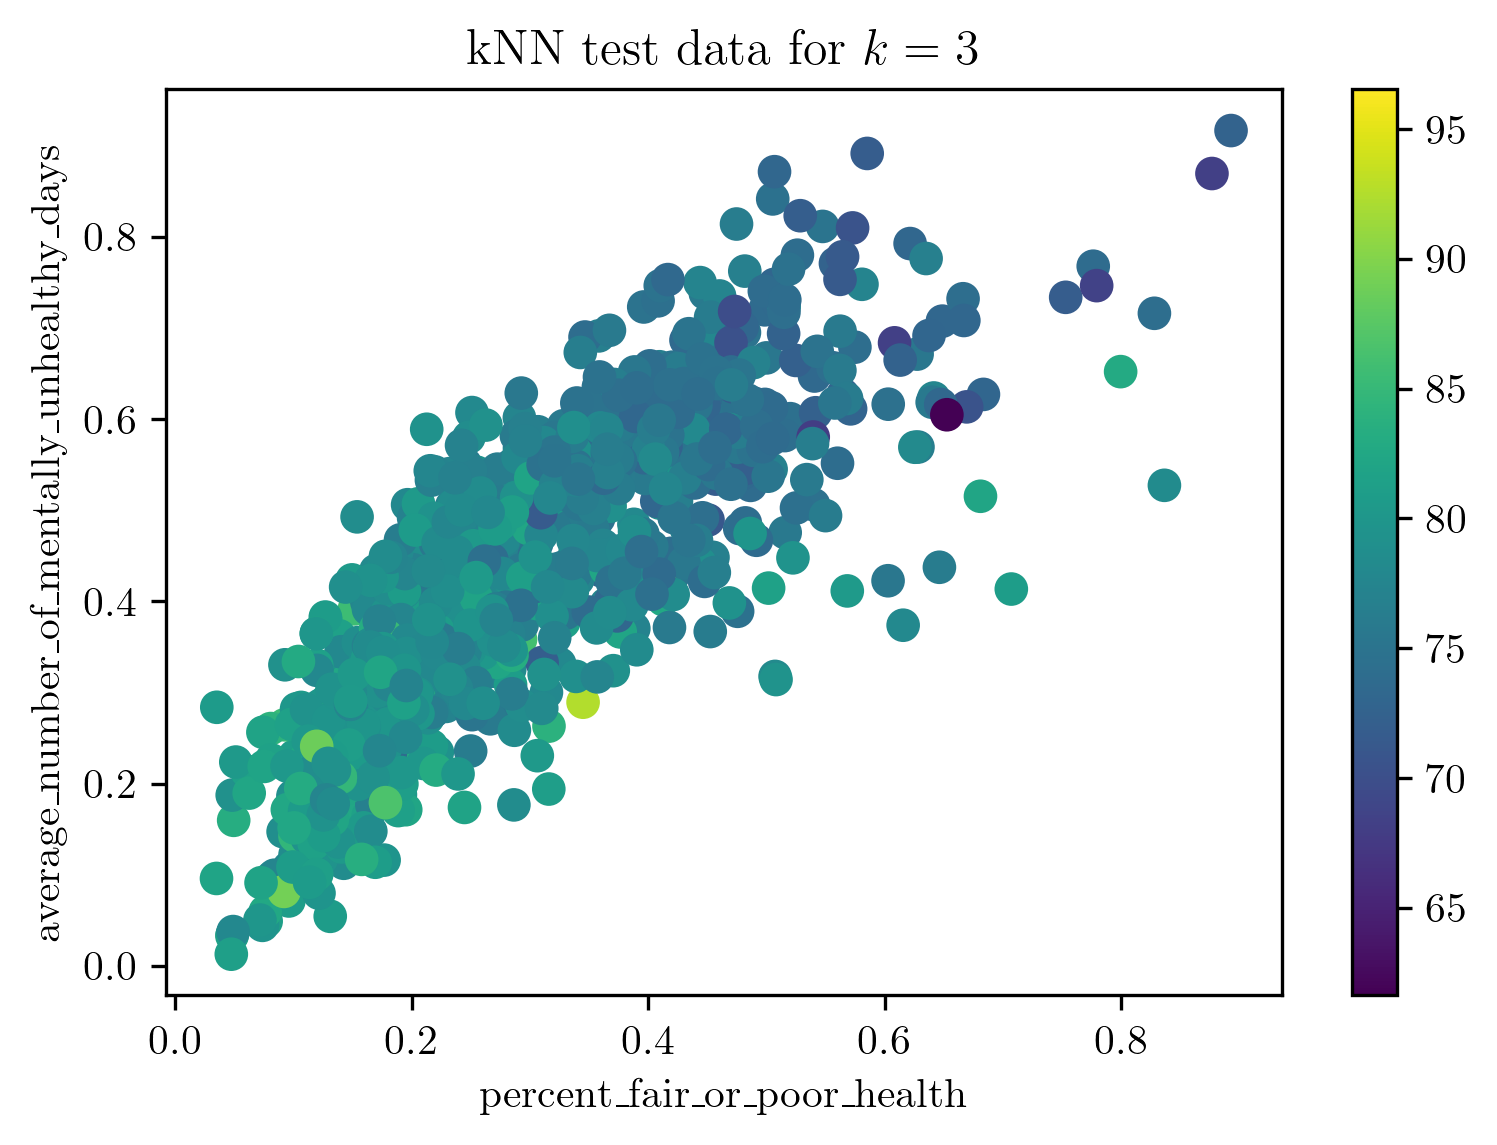

In [49]:
# Plot the actual data
plt.figure()
%matplotlib inline
import matplotlib.pyplot as plt
dpi=300   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

cmap=sns.color_palette("viridis", as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test["percent_fair_or_poor_health"], X_test["average_number_of_mentally_unhealthy_days"], c=y_test['life_expectancy'], s=50, cmap=cmap)
f.colorbar(points)
plt.title(r'kNN test data for $k=3$',fontsize=12)
plt.ylabel(r'average_number_of_mentally_unhealthy_days',fontsize=10)
plt.xlabel(r'percent_fair_or_poor_health',fontsize=10)
plt.show()

## Now, tune the parameter k

In [50]:
k_values=[1, 10, 100, 1000]

In [51]:
for k in k_values:
    print(r'For k='+str(k))
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_train_pred = knn_model.predict(X_train)
    mse = mean_squared_error(y_train, y_train_pred)
    rmse=np.sqrt(mse)
    print(r'For training set, RMSE='+str(rmse)+", and MSE="+str(mse))
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    print(r'For test set, RMSE='+str(rmse)+", and MSE="+str(mse))

For k=1
For training set, RMSE=0.0, and MSE=0.0
For test set, RMSE=2.2570954781245622, and MSE=5.094479997370347
For k=10
For training set, RMSE=1.606945179735872, and MSE=2.5822728106763537
For test set, RMSE=1.9251665669647071, and MSE=3.7062663105586764
For k=100
For training set, RMSE=1.985228446669534, and MSE=3.941131985465931
For test set, RMSE=2.074241878643159, and MSE=4.3024793711171005
For k=1000
For training set, RMSE=2.4416817352946003, and MSE=5.961809696471251
For test set, RMSE=2.4691020081234516, and MSE=6.096464726519261


In [52]:
k_values=np.arange(10)+1

In [53]:
for k in k_values:
    print(r'For k='+str(k))
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_train_pred = knn_model.predict(X_train)
    mse = mean_squared_error(y_train, y_train_pred)
    rmse=np.sqrt(mse)
    print(r'For training set, RMSE='+str(rmse)+", and MSE="+str(mse))
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    print(r'For test set, RMSE='+str(rmse)+", and MSE="+str(mse))

For k=1
For training set, RMSE=0.0, and MSE=0.0
For test set, RMSE=2.2570954781245622, and MSE=5.094479997370347
For k=2
For training set, RMSE=1.075483955180075, and MSE=1.1566657378497778
For test set, RMSE=2.078108085200148, and MSE=4.318533213774226
For k=3
For training set, RMSE=1.2767025134117904, and MSE=1.629969307751983
For test set, RMSE=1.959020820966448, and MSE=3.8377625769800554
For k=4
For training set, RMSE=1.367793833915156, and MSE=1.8708599720963213
For test set, RMSE=1.9371107859929004, and MSE=3.752398197210032
For k=5
For training set, RMSE=1.443052333385458, and MSE=2.082400036889215
For test set, RMSE=1.9442695495357558, and MSE=3.7801840812519707
For k=6
For training set, RMSE=1.4933601491387083, and MSE=2.230124535035585
For test set, RMSE=1.9419773418670094, and MSE=3.7712759963248557
For k=7
For training set, RMSE=1.5228709388309685, and MSE=2.319135896335915
For test set, RMSE=1.934194664243574, and MSE=3.7411089991883117
For k=8
For training set, RMSE=1.56

This time $k=8$.

In [54]:
k=8

In [55]:
print(r'For k='+str(k))
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse=np.sqrt(mse)
print(r'For training set, RMSE='+str(rmse)+", and MSE="+str(mse))
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(r'For test set, RMSE='+str(rmse)+", and MSE="+str(mse))

For k=8
For training set, RMSE=1.5600298738205216, and MSE=2.4336932072124724
For test set, RMSE=1.9129475246625118, and MSE=3.6593682321124317


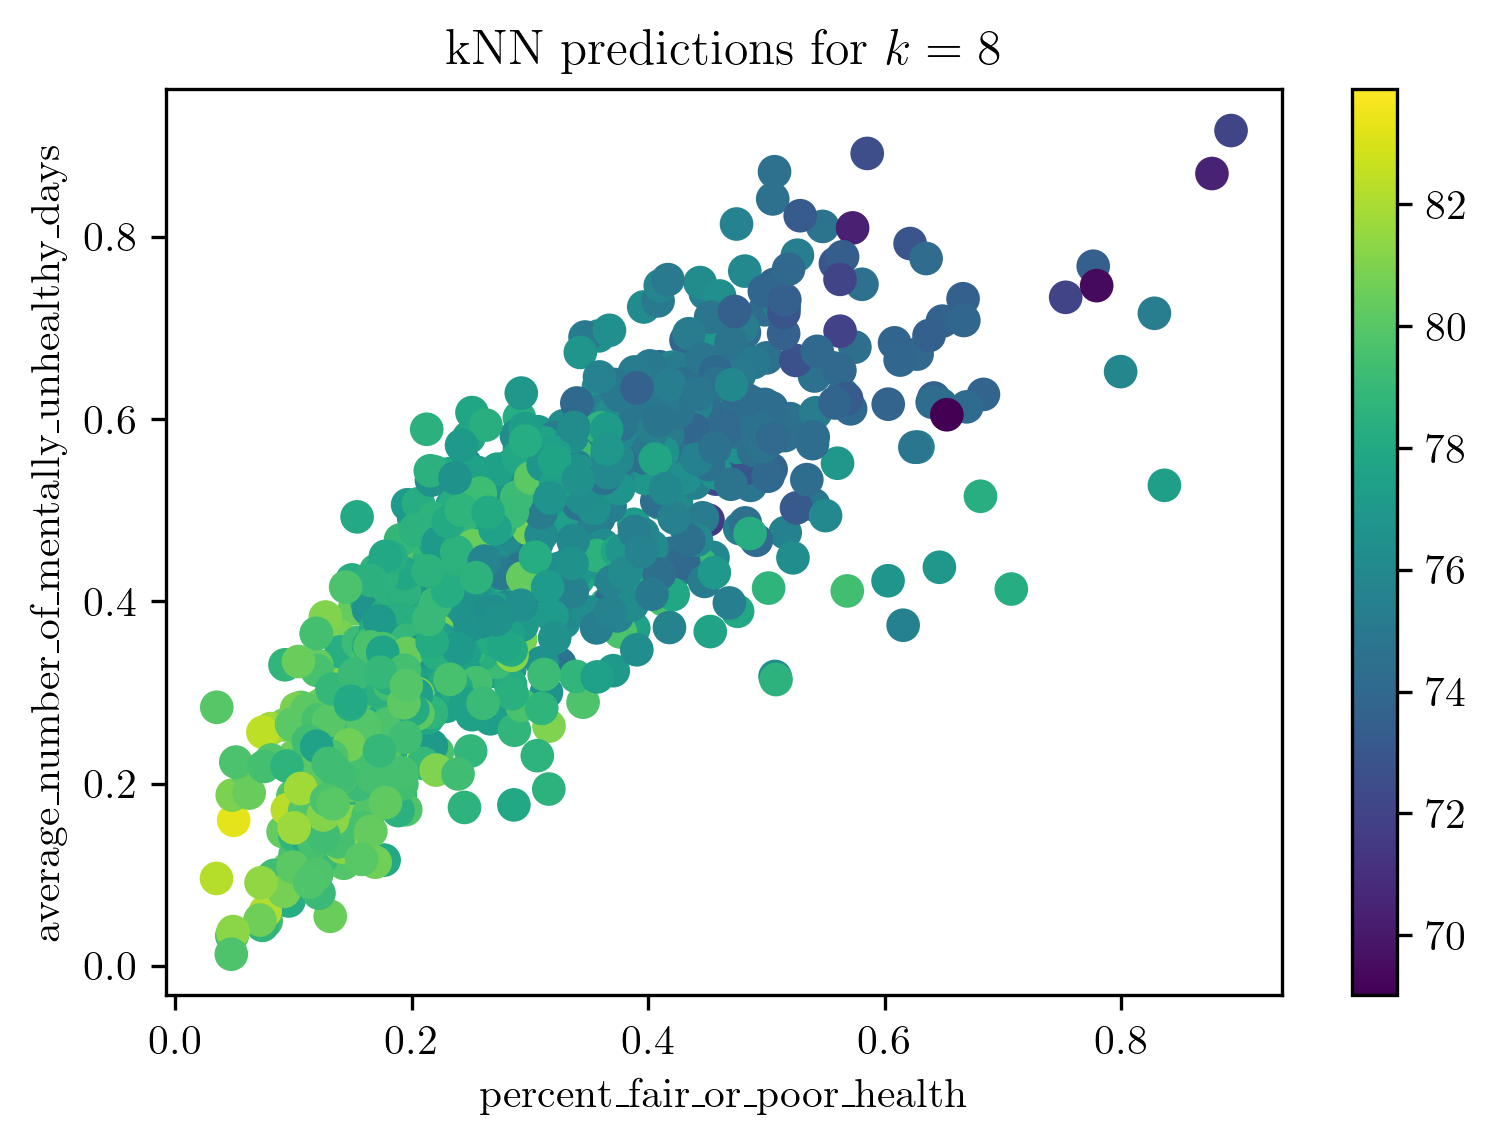

In [56]:
# Plot the fit
plt.figure()
%matplotlib inline
import matplotlib.pyplot as plt
dpi=300   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

cmap=sns.color_palette("viridis", as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test["percent_fair_or_poor_health"], X_test["average_number_of_mentally_unhealthy_days"], c=y_pred, s=50, cmap=cmap)
f.colorbar(points)
plt.title(r'kNN predictions for $k=8$',fontsize=12)
plt.ylabel(r'average_number_of_mentally_unhealthy_days',fontsize=10)
plt.xlabel(r'percent_fair_or_poor_health',fontsize=10)
plt.show()

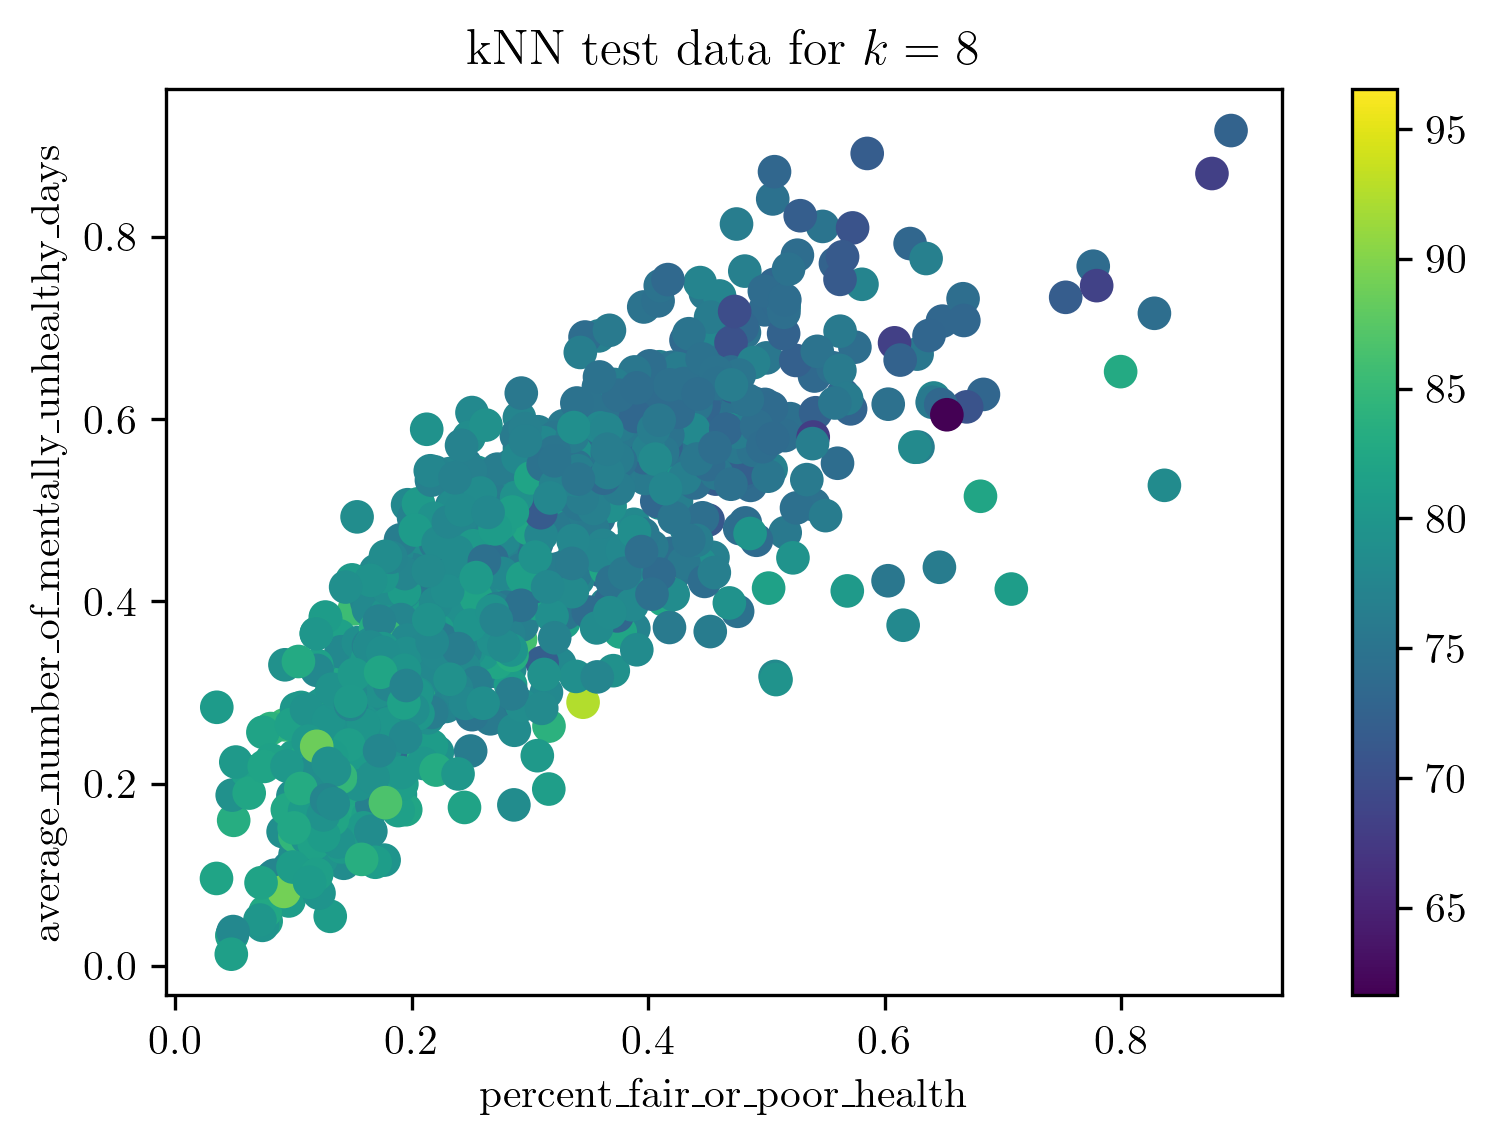

In [57]:
# Plot the actual data
plt.figure()
%matplotlib inline
import matplotlib.pyplot as plt
dpi=300   #to make the plot bigger 
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

cmap=sns.color_palette("viridis", as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test["percent_fair_or_poor_health"], X_test["average_number_of_mentally_unhealthy_days"], c=y_test['life_expectancy'], s=50, cmap=cmap)
f.colorbar(points)
plt.title(r'kNN test data for $k=8$',fontsize=12)
plt.ylabel(r'average_number_of_mentally_unhealthy_days',fontsize=10)
plt.xlabel(r'percent_fair_or_poor_health',fontsize=10)
plt.show()

## References

[1] https://realpython.com/knn-python/#:~:text=The%20kNN%20algorithm%20is%20a,in%20Python%3A%20A%20Practical%20Guide.

[2] https://thispointer.com/pandas-select-last-n-columns-of-dataframe/